In [ ]:
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the input data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,epochs = 30, batch_size = 64,validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=5)])


170498071/170498071 [==============================] - 3s 0us/step
Epoch 1/30
782/782 [==============================] - 128s 156ms/step - loss: 1.4289 - accuracy: 0.4839 - val_loss: 1.1623 - val_accuracy: 0.5834
Epoch 2/30
782/782 [==============================] - 117s 150ms/step - loss: 0.9875 - accuracy: 0.6535 - val_loss: 0.9201 - val_accuracy: 0.6858
Epoch 3/30
782/782 [==============================] - 113s 144ms/step - loss: 0.8232 - accuracy: 0.7136 - val_loss: 0.8888 - val_accuracy: 0.6962
Epoch 4/30
782/782 [==============================] - 110s 141ms/step - loss: 0.7103 - accuracy: 0.7529 - val_loss: 0.8031 - val_accuracy: 0.7239
Epoch 5/30
782/782 [==============================] - 116s 148ms/step - loss: 0.6274 - accuracy: 0.7805 - val_loss: 0.8011 - val_accuracy: 0.7280
Epoch 6/30
782/782 [==============================] - 115s 147ms/step - loss: 0.5490 - accuracy: 0.8073 - val_loss: 0.8698 - val_accuracy: 0.7148
Epoch 7/30
782/782 [==============================] - 116

In [ ]:
history.history

{'loss': [1.4288824796676636,
  0.9874680638313293,
  0.8232301473617554,
  0.7102574706077576,
  0.6273924112319946,
  0.5490445494651794,
  0.48746034502983093,
  0.421221524477005,
  0.3681126832962036,
  0.3100835084915161,
  0.26015642285346985,
  0.22270911931991577],
 'accuracy': [0.48385998606681824,
  0.6534799933433533,
  0.7135800123214722,
  0.7529000043869019,
  0.7805399894714355,
  0.8073400259017944,
  0.8306400179862976,
  0.8507999777793884,
  0.8694999814033508,
  0.8899800181388855,
  0.907260000705719,
  0.9217000007629395],
 'val_loss': [1.1622947454452515,
  0.9200682640075684,
  0.8888095021247864,
  0.8030860424041748,
  0.8010897040367126,
  0.8698416948318481,
  0.7902467250823975,
  0.8217599391937256,
  0.8266355395317078,
  0.8796565532684326,
  1.0089309215545654,
  1.033095359802246],
 'val_accuracy': [0.5834000110626221,
  0.6858000159263611,
  0.6962000131607056,
  0.7239000201225281,
  0.7279999852180481,
  0.7148000001907349,
  0.7483999729156494,
  

<Axes: >

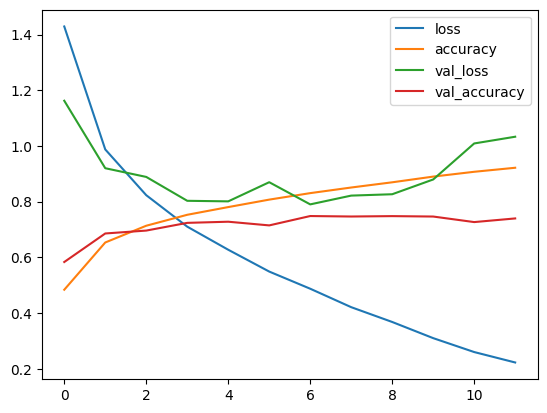

In [ ]:
import pandas as pd             #Based on the chart, where the validation loss is increasing and the validation accuracy is not improving, it indicates overfitting. Therefore, we can use the Dropout technique to prevent overfitting.
pd.DataFrame(history.history).plot()

In [ ]:
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the input data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())


model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,epochs = 30, batch_size = 64,validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=5)])


Epoch 1/30
782/782 [==============================] - 149s 188ms/step - loss: 1.4243 - accuracy: 0.4993 - val_loss: 1.3618 - val_accuracy: 0.5430
Epoch 2/30
782/782 [==============================] - 144s 185ms/step - loss: 1.0175 - accuracy: 0.6421 - val_loss: 1.1236 - val_accuracy: 0.6005
Epoch 3/30
782/782 [==============================] - 144s 184ms/step - loss: 0.8704 - accuracy: 0.6952 - val_loss: 0.9190 - val_accuracy: 0.6746
Epoch 4/30
782/782 [==============================] - 147s 188ms/step - loss: 0.7878 - accuracy: 0.7207 - val_loss: 1.2227 - val_accuracy: 0.6078
Epoch 5/30
782/782 [==============================] - 144s 184ms/step - loss: 0.7188 - accuracy: 0.7458 - val_loss: 0.7317 - val_accuracy: 0.7481
Epoch 6/30
782/782 [==============================] - 143s 183ms/step - loss: 0.6743 - accuracy: 0.7619 - val_loss: 0.7662 - val_accuracy: 0.7331
Epoch 7/30
782/782 [==============================] - 140s 179ms/step - loss: 0.6265 - accuracy: 0.7788 - val_loss: 0.8782 -

In [ ]:
history.history

{'loss': [1.450687050819397,
  1.0406718254089355,
  0.8836522698402405,
  0.7978717088699341,
  0.7270644307136536,
  0.6808662414550781,
  0.6285459995269775,
  0.596707820892334,
  0.5566558837890625,
  0.5468823313713074,
  0.5075787901878357,
  0.4824117124080658,
  0.4612205922603607,
  0.44750046730041504],
 'accuracy': [0.4867199957370758,
  0.6309000253677368,
  0.6882200241088867,
  0.7193800210952759,
  0.7428600192070007,
  0.7598400115966797,
  0.7776399850845337,
  0.7912399768829346,
  0.8032400012016296,
  0.8051400184631348,
  0.8194599747657776,
  0.8287400007247925,
  0.8351799845695496,
  0.8395199775695801],
 'val_loss': [2.4691362380981445,
  1.0564887523651123,
  1.3922175168991089,
  0.9123720526695251,
  0.8138138055801392,
  0.8172209858894348,
  0.7186048626899719,
  0.7256671190261841,
  0.6379855275154114,
  0.9203749895095825,
  0.6674572229385376,
  0.6711048483848572,
  0.6396323442459106,
  0.6611202359199524],
 'val_accuracy': [0.3222000002861023,
  0.

<Axes: >

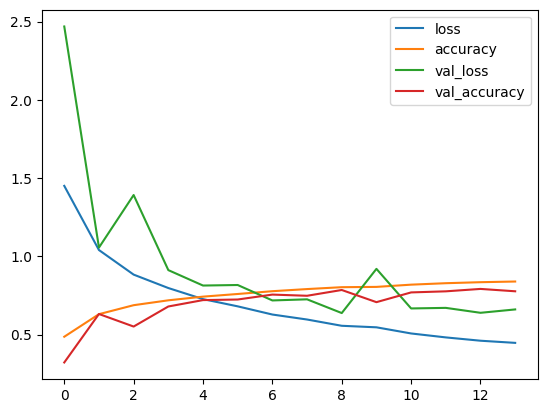

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()

<function matplotlib.pyplot.show(close=None, block=None)>

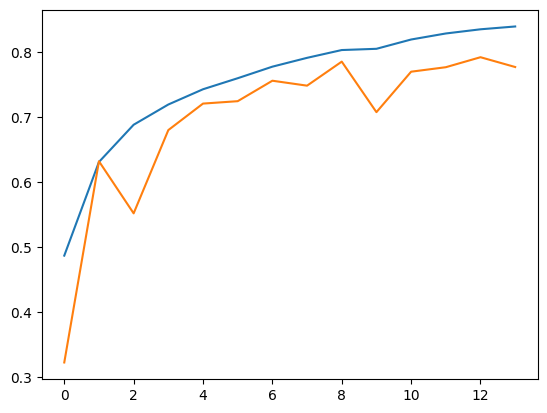

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show

In [ ]:
model.save('CNN_cifar10.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model2 = load_model('CNN_cifar10.h5')

In [ ]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
model.predict(X_test[0:10])[0]

1/1 [==============================] - 0s 183ms/step


array([1.2394517e-02, 1.0760612e-03, 8.2292774e-04, 5.5397570e-01,
       2.8688997e-05, 4.0745437e-01, 1.5580118e-02, 1.1954639e-04,
       5.0316849e-03, 3.5163590e-03], dtype=float32)

313/313 [==============================] - 9s 29ms/step


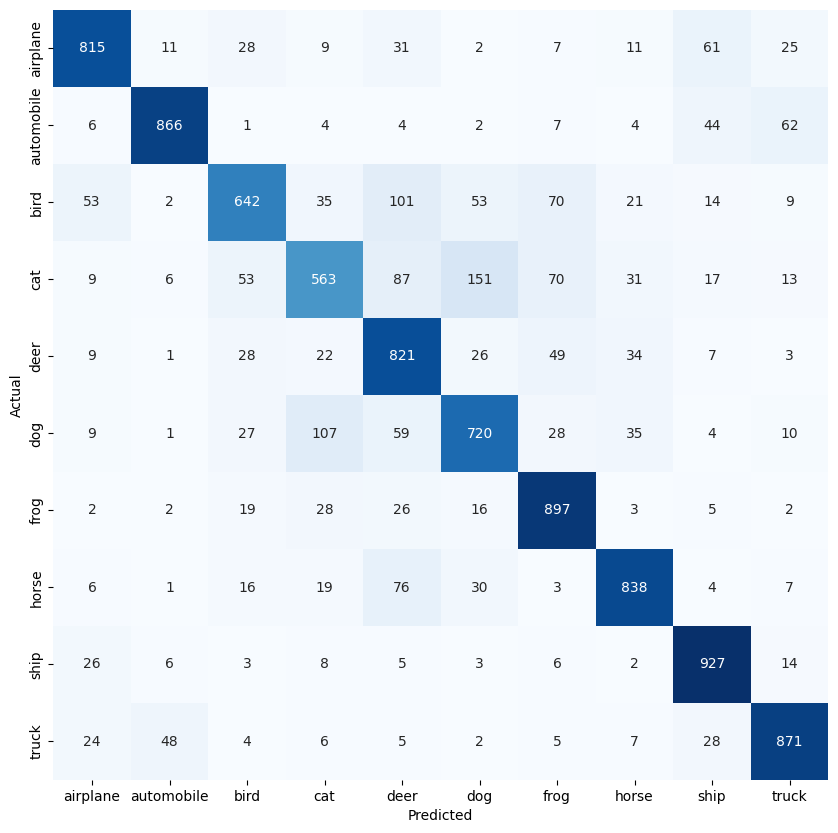

In [ ]:
# Predicting test data
import numpy as np
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)

y_test_multilabel = y_test

# Convert the multilabel-indicator to multiclass labels
y_test_multiclass = np.argmax(y_test_multilabel, axis=1)

# Make predictions on the test data
y_pred_multiclass = np.argmax(model.predict(X_test), axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test_multiclass, y_pred_multiclass)

# Plot the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
y_test = np.expand_dims(y_test_multiclass, axis=1)
predictions = np.expand_dims(y_pred_multiclass, axis=1)

In [ ]:
unique_labels = np.unique(np.concatenate((y_test, predictions), axis=1))
labels = np.array([str(label) for label in unique_labels])

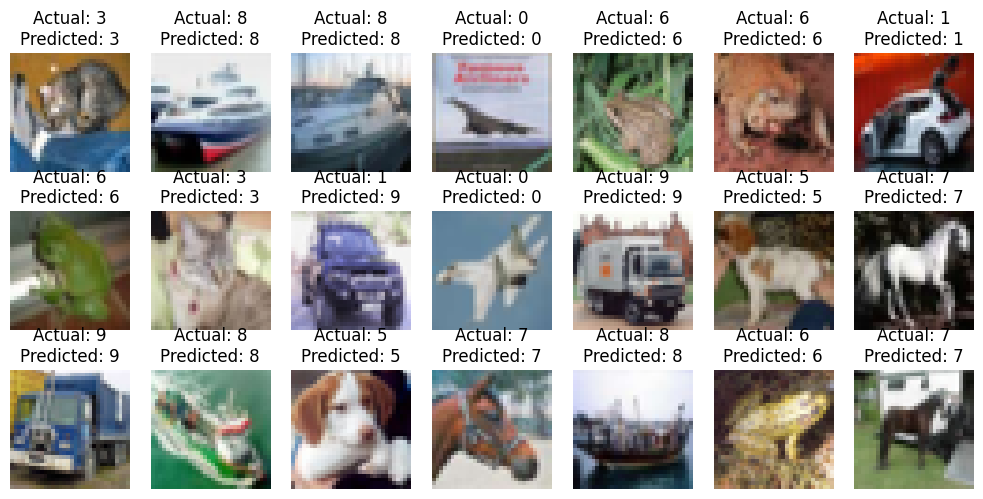

In [ ]:
# Create a figure with the desired layout
fig, axes = plt.subplots(nrows=3, ncols=7, figsize=(10, 5))

# Iterate through the images and set the titles
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_test[i], cmap='gray')
    ax.set_title(f'Actual: {labels[y_test[i,0]]}\nPredicted: {labels[predictions[i,0]]}')
    ax.axis('off')

plt.tight_layout()
plt.show()